In [18]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch

Set up data loaders

In [19]:
epochs = 20
batch_size = 4
lr = 0.01 


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.7,), (0.7,)),])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')


Print images using MatPlotLib

img shape:  (3, 32, 122)


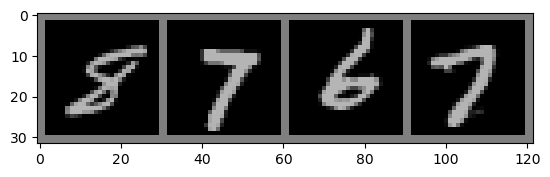

eight seven six   seven


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    print("img shape: ", npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random images
detaiter = iter(trainloader)
images, labels = next(detaiter)

# Show images 
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Classification Network Classes

In [21]:
import torch.nn as nn
# 4 layer classification model
class ClassificationModel(torch.nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel,self).__init__()
        self.layer1 = nn.Linear(input_size,20)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(20, 50)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(50, 20)
        self.out_activation = nn.Softmax(dim=1)

    def forward(self,x):
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.out_activation(x)
        return x
    

cmodel = ClassificationModel(28*28)
print(cmodel)

ClassificationModel(
  (layer1): Linear(in_features=784, out_features=20, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=20, out_features=50, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=50, out_features=20, bias=True)
  (out_activation): Softmax(dim=1)
)


Setup the optimizer 

In [22]:
import torch.optim as optim 

# Criterion
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cmodel.parameters(), lr = lr)

In [23]:
# Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        images, labels = data

        optimizer.zero_grad()   

        outputs = cmodel(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1}, {i + 1:5d}] loss: {running_loss / 2000:3f}')
            running_loss = 0.0

print("Finished Training")
        



[1,  2000] loss: 2.948667
[1,  4000] loss: 2.772358
[1,  6000] loss: 2.660576
[1,  8000] loss: 2.550366
[1, 10000] loss: 2.513792
[1, 12000] loss: 2.511102
[1, 14000] loss: 2.503191
[2,  2000] loss: 2.496682
[2,  4000] loss: 2.501625
[2,  6000] loss: 2.475843
[2,  8000] loss: 2.410324
[2, 10000] loss: 2.366885
[2, 12000] loss: 2.370235
[2, 14000] loss: 2.359010
[3,  2000] loss: 2.354137
[3,  4000] loss: 2.332966
[3,  6000] loss: 2.302412
[3,  8000] loss: 2.298851
[3, 10000] loss: 2.283532
[3, 12000] loss: 2.290506
[3, 14000] loss: 2.280816
[4,  2000] loss: 2.271519
[4,  4000] loss: 2.266380
[4,  6000] loss: 2.272281
[4,  8000] loss: 2.278057
[4, 10000] loss: 2.273097
[4, 12000] loss: 2.280013
[4, 14000] loss: 2.269959
[5,  2000] loss: 2.259684
[5,  4000] loss: 2.265862
[5,  6000] loss: 2.260670
[5,  8000] loss: 2.271211
[5, 10000] loss: 2.262948
[5, 12000] loss: 2.261801
[5, 14000] loss: 2.258639
[6,  2000] loss: 2.256191
[6,  4000] loss: 2.261225
[6,  6000] loss: 2.259231
[6,  8000] l

In [32]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cmodel(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 60,000 test images: {100*correct // total} %')

Accuracy of the network on the 60,000 test images: 85 %


In [25]:
import torch.nn as nn
# 6 layer classification model
class ClassificationModel2(torch.nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel2,self).__init__()
        self.layer1 = nn.Linear(input_size,10)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(10, 20)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(20, 30)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(30, 20)
        self.relu4 = nn.ReLU()
        self.layer5 = nn.Linear(20, 10)
        self.out_activation = nn.Softmax(dim=1)

    def forward(self,x):
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.layer4(x)
        x = self.relu4(x)
        x = self.layer5(x)
        x = self.out_activation(x)
        return x
    

cmodel2 = ClassificationModel2(28*28)
optimizer = torch.optim.SGD(cmodel2.parameters(), lr = lr)
print(cmodel2)

ClassificationModel2(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=10, out_features=20, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=20, out_features=30, bias=True)
  (relu3): ReLU()
  (layer4): Linear(in_features=30, out_features=20, bias=True)
  (relu4): ReLU()
  (layer5): Linear(in_features=20, out_features=10, bias=True)
  (out_activation): Softmax(dim=1)
)


In [26]:
# Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        images, labels = data

        optimizer.zero_grad()   

        outputs = cmodel2(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1}, {i + 1:5d}] loss: {running_loss / 2000:3f}')
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.302103
[1,  4000] loss: 2.301287
[1,  6000] loss: 2.298385
[1,  8000] loss: 2.275297
[1, 10000] loss: 2.164395
[1, 12000] loss: 2.058110
[1, 14000] loss: 1.969003
[2,  2000] loss: 1.861980
[2,  4000] loss: 1.820864
[2,  6000] loss: 1.784868
[2,  8000] loss: 1.768479
[2, 10000] loss: 1.761609
[2, 12000] loss: 1.753166
[2, 14000] loss: 1.754285
[3,  2000] loss: 1.734358
[3,  4000] loss: 1.750358
[3,  6000] loss: 1.742483
[3,  8000] loss: 1.733402
[3, 10000] loss: 1.739997
[3, 12000] loss: 1.735807
[3, 14000] loss: 1.737980
[4,  2000] loss: 1.738628
[4,  4000] loss: 1.732097
[4,  6000] loss: 1.738003
[4,  8000] loss: 1.723495
[4, 10000] loss: 1.732621
[4, 12000] loss: 1.734967
[4, 14000] loss: 1.721527
[5,  2000] loss: 1.729520
[5,  4000] loss: 1.729660
[5,  6000] loss: 1.731913
[5,  8000] loss: 1.722504
[5, 10000] loss: 1.722176
[5, 12000] loss: 1.715570
[5, 14000] loss: 1.728440
[6,  2000] loss: 1.723085
[6,  4000] loss: 1.725714
[6,  6000] loss: 1.719734
[6,  8000] l

In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cmodel2(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 60,000 test images: {100*correct // total} %')

Accuracy of the network on the 60,000 test images: 83 %


In [28]:
import torch.nn as nn
# 6 layer classification model
class ClassificationModel3(torch.nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel3,self).__init__()
        self.layer1 = nn.Linear(input_size,10)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(10, 40)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(40, 70)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(70, 40)
        self.relu4 = nn.ReLU()
        self.layer5 = nn.Linear(40, 10)
        self.out_activation = nn.Softmax(dim=1)

    def forward(self,x):
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.layer4(x)
        x = self.relu4(x)
        x = self.layer5(x)
        x = self.out_activation(x)
        return x
    

cmodel3 = ClassificationModel3(28*28)
optimizer = torch.optim.SGD(cmodel3.parameters(), lr = lr)
print(cmodel3)

ClassificationModel3(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=10, out_features=40, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=40, out_features=70, bias=True)
  (relu3): ReLU()
  (layer4): Linear(in_features=70, out_features=40, bias=True)
  (relu4): ReLU()
  (layer5): Linear(in_features=40, out_features=10, bias=True)
  (out_activation): Softmax(dim=1)
)


In [29]:
# Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        images, labels = data

        optimizer.zero_grad()   

        outputs = cmodel3(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1}, {i + 1:5d}] loss: {running_loss / 2000:3f}')
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.302390
[1,  4000] loss: 2.301673
[1,  6000] loss: 2.299902
[1,  8000] loss: 2.270108
[1, 10000] loss: 2.193524
[1, 12000] loss: 2.071415
[1, 14000] loss: 1.940704
[2,  2000] loss: 1.859803
[2,  4000] loss: 1.838214
[2,  6000] loss: 1.829606
[2,  8000] loss: 1.809322
[2, 10000] loss: 1.822718
[2, 12000] loss: 1.816866
[2, 14000] loss: 1.798883
[3,  2000] loss: 1.803777
[3,  4000] loss: 1.798094
[3,  6000] loss: 1.795883
[3,  8000] loss: 1.795840
[3, 10000] loss: 1.789050
[3, 12000] loss: 1.757133
[3, 14000] loss: 1.743102
[4,  2000] loss: 1.736533
[4,  4000] loss: 1.725802
[4,  6000] loss: 1.729669
[4,  8000] loss: 1.730535
[4, 10000] loss: 1.720577
[4, 12000] loss: 1.720831
[4, 14000] loss: 1.714643
[5,  2000] loss: 1.722208
[5,  4000] loss: 1.719739
[5,  6000] loss: 1.717218
[5,  8000] loss: 1.726192
[5, 10000] loss: 1.709545
[5, 12000] loss: 1.713187
[5, 14000] loss: 1.717785
[6,  2000] loss: 1.717777
[6,  4000] loss: 1.715523
[6,  6000] loss: 1.721765
[6,  8000] l

In [33]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cmodel3(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 60,000 test images: {100*correct // total} %')

Accuracy of the network on the 60,000 test images: 76 %


Which of the three models had the least amount of error for validation? 
The 4 layered model is the one that had the least amount of error for validation with an accuracy percentage of 85%. it is followed by the first 6 layered model with the average accuracy percentage of 83%. Lastly, we have the second 6 layered model with the average accuracy percentage of 76%.

How long it took to train each model?
    a. The 4 layer model took around 10 minutes to train. 
    b. The first 6 layer model took around 11 minutes to train
    c. The second 6 layer model took around 12 minutes to train